In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Ginibre matrix - Circular law

In [2]:
dim = 1000
M = np.random.randn(dim, dim) / np.sqrt(dim)
eigvals = np.linalg.eigvals(M)

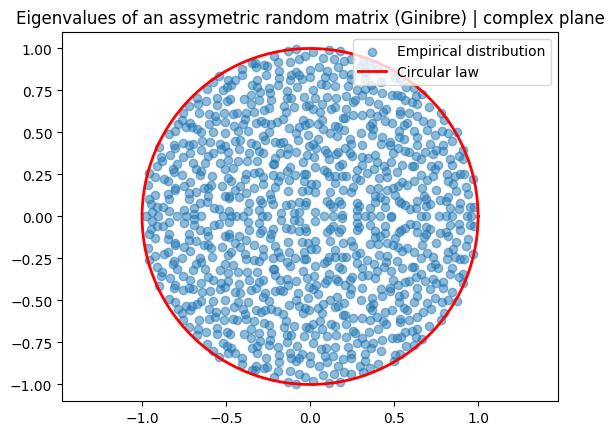

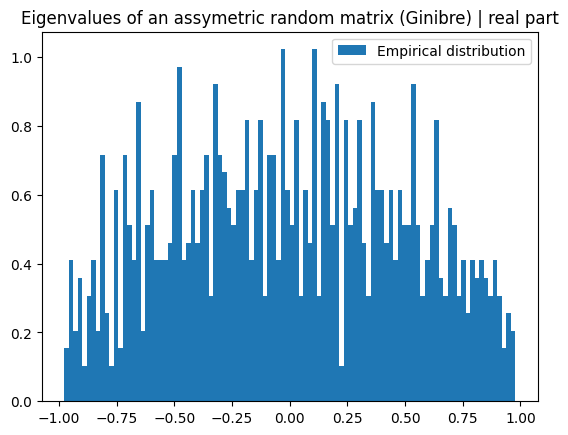

In [7]:
plt.scatter(eigvals.real, eigvals.imag, alpha=0.5, label="Empirical distribution")
theta = np.linspace(0, 2*np.pi, 200)
plt.plot(np.cos(theta), np.sin(theta), 'r-', lw=2, label="Circular law")
plt.legend()
plt.axis("equal")
plt.title("Eigenvalues of an assymetric random matrix (Ginibre) | complex plane")
plt.show()
plt.hist(eigvals.real, bins=100, density=True, label="Empirical distribution")
plt.legend()
plt.title("Eigenvalues of an assymetric random matrix (Ginibre) | real part")
plt.show()

### Wigner matrix - Semicircular law

In [58]:
dim = 1000
M = np.random.randn(dim, dim) / np.sqrt(dim)
M_sym = (M + M.T) / np.sqrt(2)
eigvals = np.linalg.eigvals(M_sym)

In [60]:
dim = 1000
M = np.random.randn(dim, dim) / np.sqrt(dim)
M_sym = np.zeros((dim, dim))
lowtri = np.tril(np.ones((dim, dim,)), )
M_sym +=  M * lowtri
M_sym += (M * lowtri).T
eigvals = np.linalg.eigvals(M_sym)

In [61]:
M_sym[:5,:5]

array([[-0.025304  ,  0.03655198, -0.00523196, -0.03141902, -0.04283719],
       [ 0.03655198,  0.03049095, -0.02469247,  0.02500713,  0.00104289],
       [-0.00523196, -0.02469247, -0.00481605, -0.0719115 , -0.02977185],
       [-0.03141902,  0.02500713, -0.0719115 ,  0.01409834, -0.03650176],
       [-0.04283719,  0.00104289, -0.02977185, -0.03650176, -0.03609947]])

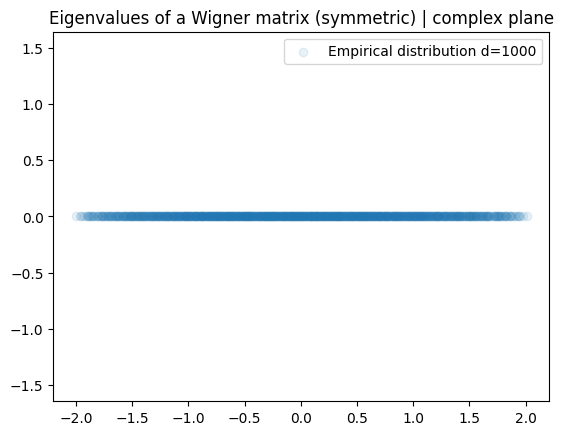

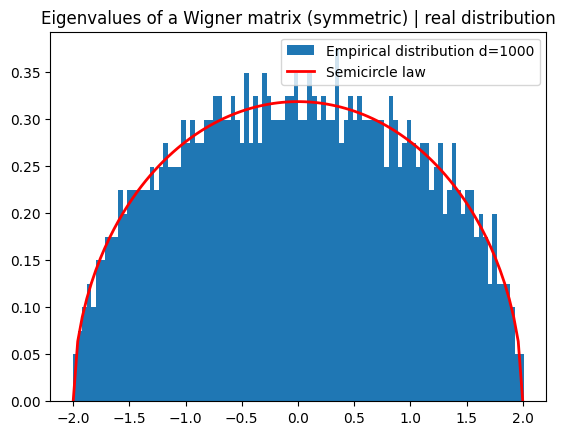

In [68]:
plt.scatter(eigvals.real, eigvals.imag, alpha=0.1, label=f"Empirical distribution d={dim}")
plt.axis("equal")
plt.legend()
plt.title(f"Eigenvalues of a Wigner matrix (symmetric) | complex plane")
plt.show()
plt.hist(eigvals.real, bins=100, density=True, label=f"Empirical distribution d={dim}")
x = np.linspace(-2, 2, 100)
plt.plot(x, 1 / 2 / np.pi * np.sqrt(4 - x**2), lw=2, color="red", label="Semicircle law")
plt.legend()
plt.title(f"Eigenvalues of a Wigner matrix (symmetric) | real distribution")
plt.show()

### Partial correlation: Interpolation between symmetry and assymmetry - Ellipse law

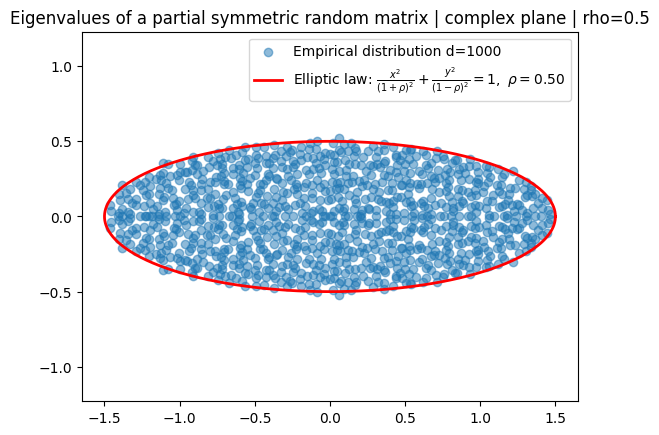

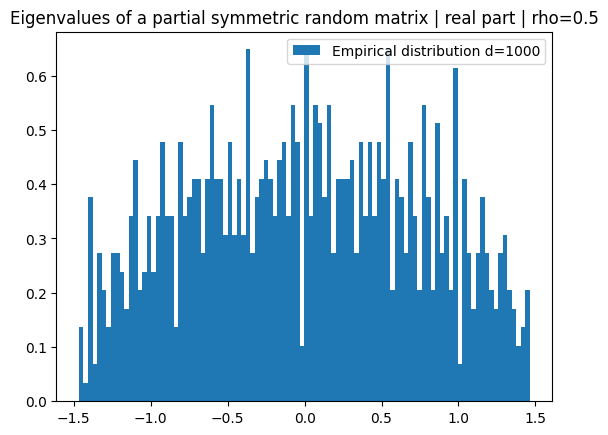

In [81]:
rho = 0.5
dim = 1000
M = np.random.randn(dim, dim) / np.sqrt(dim)
M_asym = np.zeros((dim, dim))
lowtri = np.tril(np.ones((dim, dim,)), -1)
uptri = np.triu(np.ones((dim, dim,)), 1)
M_asym += M * lowtri
M_asym += rho * (M * lowtri).T + np.sqrt(1 - rho**2) * (M * uptri)
eigvals = np.linalg.eigvals(M_asym)

plt.scatter(eigvals.real, eigvals.imag, alpha=0.5, label=f"Empirical distribution d={dim}")
theta = np.linspace(0, 2*np.pi, 400)
a, b = 1 + rho, 1 - rho
x_ell =  a * np.cos(theta)
y_ell =  b * np.sin(theta)
plt.plot(
    x_ell, y_ell, 
    color='r', linewidth=2,
    label=rf"Elliptic law: $\frac{{x^2}}{{(1+\rho)^2}}+\frac{{y^2}}{{(1-\rho)^2}}=1,\ \rho={rho:.2f}$"
)
plt.legend()
plt.axis("equal")
plt.legend()
plt.title(f"Eigenvalues of a partial symmetric random matrix | complex plane | rho={rho}")
plt.show()
plt.hist(eigvals.real, bins=100, density=True, label=f"Empirical distribution d={dim}")
plt.legend()
plt.title(f"Eigenvalues of a partial symmetric random matrix | real part | rho={rho}")
plt.show()

### Wishart matrix - Marchenko Pastur law

In [32]:
def marchenko_pastur_density(x, gamma):
    """Compute the Marchenko-Pastur probability density at x for given gamma."""
    if gamma >= 1:
        raise ValueError("gamma must be less than 1")
        
    # Support bounds
    a = (1 - np.sqrt(gamma))**2
    b = (1 + np.sqrt(gamma))**2
    # Return 0 outside the support
    if x < a or x > b:
        return 0
    # MP density formula
    return np.sqrt((b-x)*(x-a))/(2*np.pi*gamma*x)


def marchenko_pastur_density_vec(x, gamma):
    """Compute the Marchenko-Pastur probability density at x for given gamma."""
    if gamma < 0:
        raise ValueError("gamma must be less than 1")
        
    # Support bounds
    a = (1 - np.sqrt(gamma))**2
    b = (1 + np.sqrt(gamma))**2
    # Return 0 outside the support
    x_vec = np.array([x])
    density = np.sqrt((b-x_vec)*(x_vec-a))/(2*np.pi*gamma*x_vec)
    density = np.where(x_vec < a, 0, density)
    density = np.where(x_vec > b, 0, density)
    # MP density formula
    return density



if False:
    # Create points for plotting the density
    x = np.linspace(0, 3, 1000)
    plt.figure(figsize=(10,6))
    gamma = 0.1
    y = marchenko_pastur_density_vec(x, gamma)[0]
    plt.plot(x, y, 'r-', lw=2, label='Marchenko-Pastur density (gamma=0.1)')
    gamma = 2
    y = marchenko_pastur_density_vec(x, gamma)[0]
    plt.plot(x, y, 'b-', lw=2, label='Marchenko-Pastur density (gamma=2)')

    plt.grid(True)
    plt.title(f'Marchenko-Pastur Distribution (γ={gamma})')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


#### More classic case - num feature p < num samples n, gamma<0

/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_4791/2189818025.py:26: RuntimeWarning: invalid value encountered in sqrt
  density = np.sqrt((b-x_vec)*(x_vec-a))/(2*np.pi*gamma*x_vec)


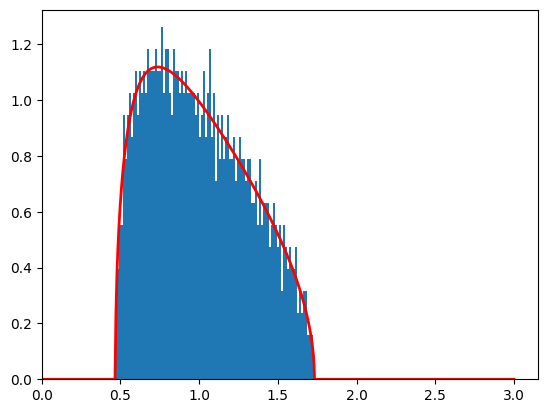

In [31]:
gamma = 0.1
n = 10000
p = int(n * gamma)
X = np.random.randn(n, p)
G = X.T @ X / n
eigvals = np.linalg.eigvalsh(G)

plt.hist(eigvals, bins=100, density=True)
x = np.linspace(0, 3, 1000)
y = marchenko_pastur_density_vec(x, gamma)[0]
plt.plot(x, y, 'r-', lw=2, label='Marchenko-Pastur density')
plt.xlim(0, None)
plt.show()

#### Overparametrized / insufficient sample case - num feature p > num samples n, gamma>0

/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_1955/1760053163.py:28: RuntimeWarning: invalid value encountered in sqrt
  density = np.sqrt((b-x_vec)*(x_vec-a))/(2*np.pi*gamma*x_vec)


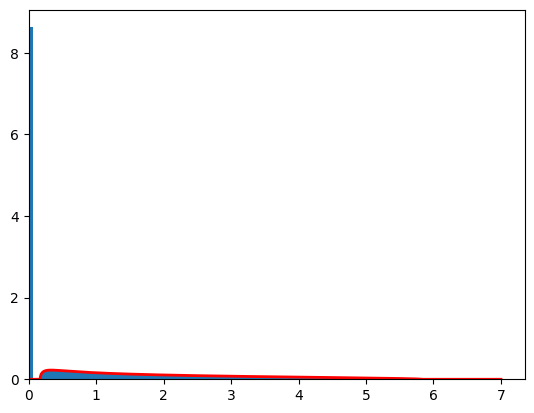

In [123]:
gamma = 2
n = 1000
p = int(n * gamma)
X = np.random.randn(n, p)
G = X.T @ X / n
eigvals = np.linalg.eigvalsh(G)

plt.hist(eigvals, bins=100, density=True)
x = np.linspace(0, 7, 1000)
y = marchenko_pastur_density_vec(x, gamma)[0]
plt.plot(x, y, 'r-', lw=2, label='Marchenko-Pastur density')
plt.xlim(0, None)
plt.show()

### Singular values of Rectangle Random (Ginibre) matrix 

In [16]:
def marchenko_pastur_density_vec_singularvalue(x, gamma):
    """Compute the Marchenko-Pastur probability density at x for given gamma.
    This is the square root of MP density, without the zero eigenvalue.
        
        SV^2 \sim \rho_MP(\gamma) \quad \text{for } SV > 0
        \rho_SV(v) = 2 v \rho_MP(v^2) 
    """
    if gamma < 0:
        raise ValueError("gamma must be less than 1")
        
    # Support bounds
    a = (1 - np.sqrt(gamma))**2
    b = (1 + np.sqrt(gamma))**2
    # Return 0 outside the support
    x_vec = np.array([x])
    density = np.sqrt((b-x_vec**2)*(x_vec**2-a))/(np.pi*gamma*x_vec)
    density = np.where(x_vec < np.sqrt(a), 0, density)
    density = np.where(x_vec > np.sqrt(b), 0, density)
    # MP density formula
    return density

/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_4791/4124450699.py:11: RuntimeWarning: invalid value encountered in sqrt
  density = np.sqrt((b-x_vec**2)*(x_vec**2-a))/(np.pi*gamma*x_vec)


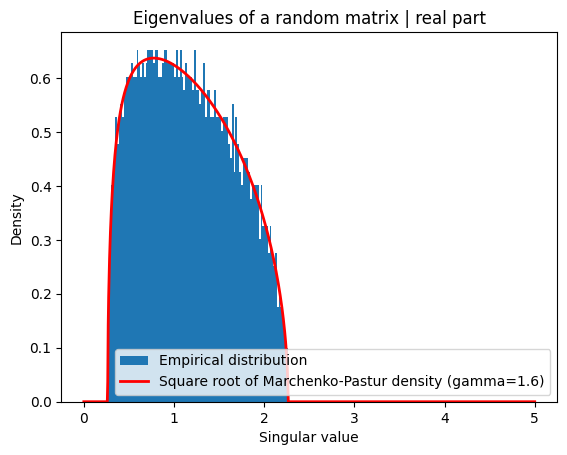

In [30]:
n = 2000
p = 3200
gamma = p / n
M = np.random.randn(n, p) / np.sqrt(n)
U, S, V = np.linalg.svd(M)
plt.hist(S, bins=100, density=True, label="Empirical distribution")
x = np.linspace(0, 5, 1000)
y = marchenko_pastur_density_vec_singularvalue(x, gamma)[0] * max(gamma, 1)
plt.plot(x, y, 'r-', lw=2, label=f'Square root of Marchenko-Pastur density (gamma={gamma})')
plt.legend()
plt.xlabel("Singular value")
plt.ylabel("Density")
plt.title("Eigenvalues of a random matrix | real part")
plt.show()

### Product of Ginibre random matrices

This law was cited in 
> **Resurrecting the sigmoid in deep learning through dynamical isometry: theory and practice**
> Jeffrey Pennington, Samuel S. Schoenholz, Surya Ganguli

https://arxiv.org/abs/1711.04735

Originally derived in this

> **PLANCHEREL–ROTACH FORMULAE FOR AVERAGE CHARACTERISTIC POLYNOMIALS OF PRODUCTS OF GINIBRE RANDOM MATRICES AND THE FUSS–CATALAN DISTRIBUTION**  THORSTEN NEUSCHEL

https://doi.org/10.1142/S2010326314500038

$$
\rho\bigl(s(\phi)\bigr)
= \frac{2}{\pi}
   \sqrt{
     \frac{\sin^3(\phi)\,\bigl[\sin(L\phi)\bigr]^{\,L-2}}
          {\bigl[\sin\bigl((L+1)\phi\bigr)\bigr]^{\,L-1}}
   }\;, \\[1ex]
s(\phi)
= \sqrt{
     \frac{\bigl[\sin\bigl((L+1)\phi\bigr)\bigr]^{\,L+1}}
          {\sin(\phi)\,\bigl[\sin(L\phi)\bigr]^L}
   }.
$$

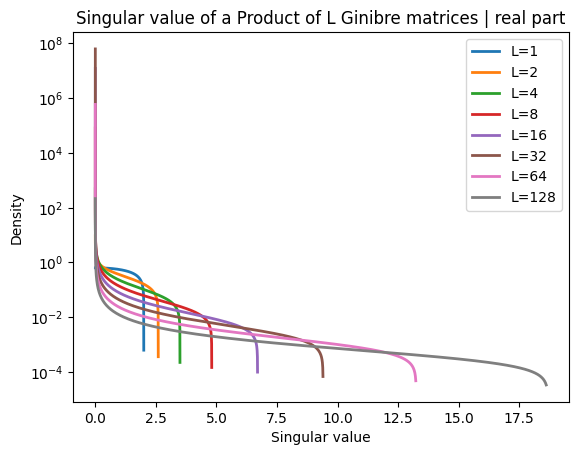

In [53]:
import numpy as np

def s(phi, L):
    """
    s(phi) = sqrt( sin^{L+1}((L+1)*phi) / ( sin(phi) * sin^L(L*phi) ) )
    """
    num   = np.sin((L+1)*phi)**(L+1)
    denom = np.sin(phi) * (np.sin(L*phi)**L)
    return np.sqrt(num / denom)

def rho(phi, L):
    """
    rho(s(phi)) = (2/pi) * sqrt( sin^3(phi) * sin^{L-2}(L*phi) / sin^{L-1}((L+1)*phi) )
    """
    numer   = np.sin(phi)**3 * (np.sin(L*phi)**(L-2))
    denom   = np.sin((L+1)*phi)**(L-1)
    return (2.0/np.pi) * np.sqrt(numer / denom)

def compute_s_and_rho(L, epsilon=0.001, n_points=500):
    phi = np.linspace(epsilon, np.pi/(L+1)-epsilon, n_points)
    s_vals   = s(phi, L)
    rho_vals = rho(phi, L)
    return s_vals, rho_vals

# Example usage:
L   = 1
for L in [1, 2, 4, 8, 16, 32, 64, 128,]:
    s_vals, rho_vals = compute_s_and_rho(L, epsilon=0.001, n_points=500)
    plt.plot(s_vals, rho_vals, lw=2, label=f'L={L}')
plt.yscale("log")
plt.legend()
plt.xlabel("Singular value")
plt.ylabel("Density")
plt.title("Singular value of a Product of L Ginibre matrices | real part")
plt.show()

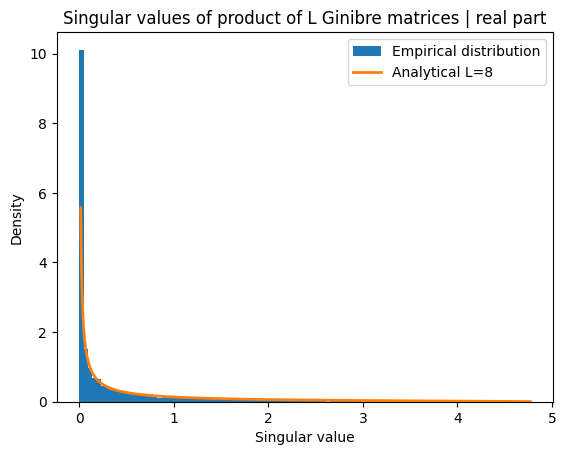

In [67]:
n = 1000
L = 8
F = [np.random.randn(n, n) / np.sqrt(n) for _ in range(L)]
G = np.linalg.multi_dot(F)
eigvals = np.linalg.svd(G)[1]
plt.hist(eigvals, bins=100, density=True, label="Empirical distribution")
s_vals, rho_vals = compute_s_and_rho(L, epsilon=0.02, n_points=500)
plt.plot(s_vals, rho_vals, lw=2, label=f'Analytical L={L}')
plt.xlabel("Singular value")
plt.ylabel("Density")
plt.legend()
plt.title("Singular values of product of L Ginibre matrices | real part")
plt.show()

**The emergence of spectral universality in deep networks**

Jeffrey Pennington, Samuel Schoenholz, Surya Ganguli, ICML, 2018.

https://proceedings.mlr.press/v84/pennington18a.html

Classic works that derive the whole SV spectra for deep networks with nonlinearities. 


* https://arxiv.org/abs/1401.7802
* The formula are pretty scary...